<br>
<h1 style = "font-size:40px; font-family:Garamond ; font-weight : normal; background-color: #C66363 ; color : #E8D6D8; text-align: center; border-radius: 100px 100px;">CONTENT </h1>
<br>

* [Add Libaries](#1)
* [Load and Examine Data](#2)
* [Quick Look With Visualization](#3)
* [Processing Data](#4)
* [Model Training](#5)

<a id="1"> </a>
# Add Libaries

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/water-potability/water_potability.csv


<a id="2"> </a>
# Load and Examine Data

In [2]:
train_df = pd.read_csv("../input/water-potability/water_potability.csv")

In [3]:
train_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
train_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<a id="3"> </a>
# Quick Look With Visualization

<AxesSubplot:xlabel='Potability', ylabel='Turbidity'>

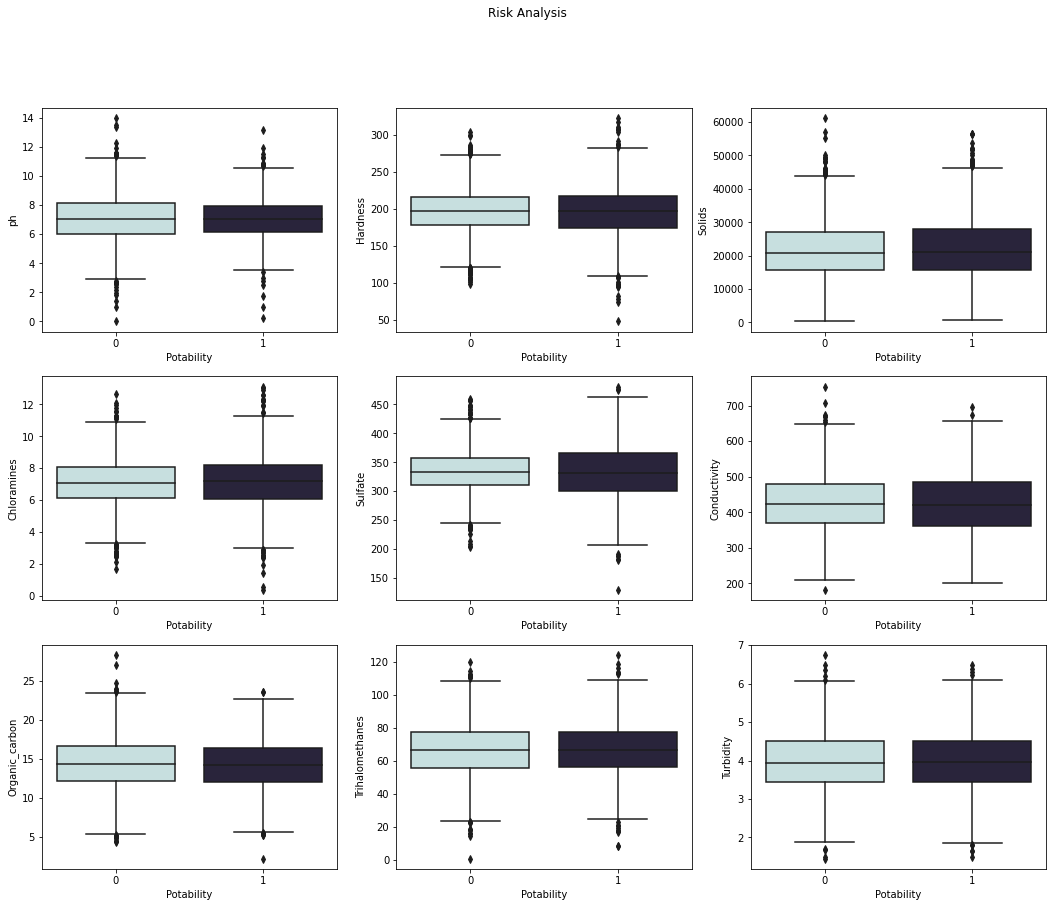

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(18, 14))

fig.suptitle('Risk Analysis')

sns.boxplot(ax=axes[0, 0], data=train_df, x='Potability', y='ph',palette=("ch:start=.2,rot=-.3"))
sns.boxplot(ax=axes[0, 1], data=train_df, x='Potability', y='Hardness',palette=("ch:start=.2,rot=-.3"))
sns.boxplot(ax=axes[0, 2], data=train_df, x='Potability', y='Solids',palette=("ch:start=.2,rot=-.3"))
sns.boxplot(ax=axes[1, 0], data=train_df, x='Potability', y='Chloramines',palette=("ch:start=.2,rot=-.3"))
sns.boxplot(ax=axes[1, 1], data=train_df, x='Potability', y='Sulfate',palette=("ch:start=.2,rot=-.3"))
sns.boxplot(ax=axes[1, 2], data=train_df, x='Potability', y='Conductivity',palette=("ch:start=.2,rot=-.3"))
sns.boxplot(ax=axes[2, 0], data=train_df, x='Potability', y='Organic_carbon',palette=("ch:start=.2,rot=-.3"))
sns.boxplot(ax=axes[2, 1], data=train_df, x='Potability', y='Trihalomethanes',palette=("ch:start=.2,rot=-.3"))
sns.boxplot(ax=axes[2, 2], data=train_df, x='Potability', y='Turbidity',palette=("ch:start=.2,rot=-.3"))

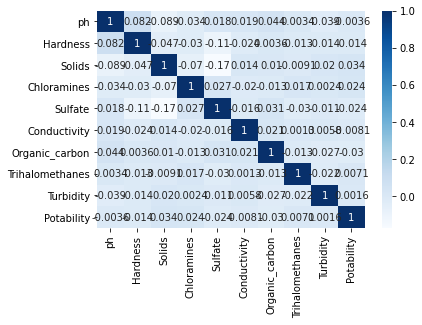

In [7]:
corr_df=train_df
corrMatrix = corr_df.corr()
sns.heatmap(corrMatrix, annot=True ,cmap="Blues")
sns.set(rc={'figure.figsize':(10,10)})

<a id="4"> </a>
# Processing Data

In [8]:
def detect_miss(df,features):
    miss_indices = []
    
    for c in features:
        
        miss_list_col = df[df[c].isna()].index
        miss_indices.extend(miss_list_col)
    
    miss_indices = Counter(miss_indices)
    multiple_miss = list(i for i, v in miss_indices.items() if v > 2)
    
    return multiple_miss

In [9]:
train_df.loc[detect_miss(train_df,['ph','Hardness','Solids','Sulfate','Conductivity','Organic_carbon','Trihalomethanes' ,'Turbidity'])]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
141,NaN,167.386127,20944.620814,4.963124,NaN,566.339294,11.318807,NaN,3.679795,0
201,NaN,229.771350,16162.262307,4.933662,NaN,448.846036,8.816487,NaN,4.600928,0
387,NaN,143.300200,16263.167465,6.229737,NaN,503.664085,19.585497,NaN,3.451740,1
646,NaN,221.620058,11954.700730,6.657053,NaN,391.238714,12.961433,NaN,3.282061,0
929,NaN,202.079864,12519.090660,7.627524,NaN,399.883388,12.748217,NaN,4.439215,0
992,NaN,226.765646,39942.953898,8.594715,NaN,538.621803,13.744749,NaN,4.863378,0
2065,NaN,184.993731,19764.627445,7.505092,NaN,293.477998,12.934160,NaN,3.017985,0
3062,NaN,209.531697,44982.734155,8.898024,NaN,349.385235,15.653299,NaN,3.832479,0
3067,NaN,193.091260,17777.100086,6.087949,NaN,543.114953,10.717588,NaN,3.878664,0


In [10]:
train_df = train_df.drop(detect_miss(train_df,['ph','Hardness','Solids','Sulfate','Conductivity','Organic_carbon','Trihalomethanes' ,'Turbidity']),axis = 0).reset_index(drop = True)

In [11]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [12]:
train_df.loc[detect_outliers(train_df,['ph','Hardness','Solids','Sulfate','Conductivity','Organic_carbon','Trihalomethanes' ,'Turbidity'])]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [13]:
train_df.isnull().sum()

ph                 482
Hardness             0
Solids               0
Chloramines          0
Sulfate            772
Conductivity         0
Organic_carbon       0
Trihalomethanes    153
Turbidity            0
Potability           0
dtype: int64

In [14]:
train_df["ph"] = train_df["ph"].fillna(np.mean(train_df["ph"]))
train_df["Sulfate"] = train_df["Sulfate"].fillna(np.mean(train_df["Sulfate"]))
train_df["Trihalomethanes"] = train_df["Trihalomethanes"].fillna(np.mean(train_df["Trihalomethanes"]))

<a id="5"> </a>
# Model Training

In [15]:
Y = train_df[['Potability']]
X = train_df.drop(['Potability'],axis=1)

In [16]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

X = pd.DataFrame(X)

In [17]:
Y["Potability"] = train_df["Potability"].astype("category")

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 60.08
Testing Accuracy: % 63.65


In [20]:
random_state = 42
classifier = [GradientBoostingClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

gb_param_grid = {"n_estimators":[5,50,250,500],
                 "max_depth":[1,3,5,7,9],
                 "learning_rate":[0.01,0.1,1,2]}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [gb_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [21]:
GradientBoostingClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [22]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 12.1min finished


0.6526530612244898
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  1.2min finished


0.6742857142857143
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  4.0min finished


0.6587755102040816
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.6
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.4s


0.6534693877551021


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.6s finished


Text(0.5, 1.0, 'Cross Validation Scores')

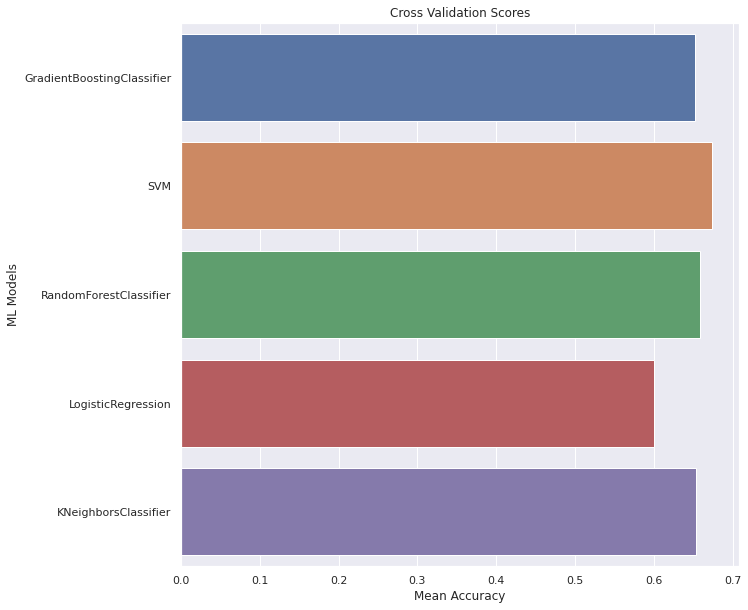

In [23]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["GradientBoostingClassifier","SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [24]:
votingC = VotingClassifier(estimators = [('svc',best_estimators[1]),
                                        ("rfc",best_estimators[2]),
                                        ("knn",best_estimators[4])],
                                        voting = "hard", n_jobs = -1, weights=[2, 1, 1])
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.6891064871481029
